In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading the dataframe
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\Datasets\Online Retail.csv")

In [4]:
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   InvoiceTime  541909 non-null  object 
 3   StockCode    541909 non-null  object 
 4   Description  540455 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Totalsale    541909 non-null  float64
 8   CustomerID   406829 non-null  float64
 9   Country      541909 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.3+ MB


1.convert the invoicedate to type date
2.convert the invoicetime to  type date
3.drop the records in the description column as one cannot fill uknown descriptions with mode.
4.also drop the records missing CustomerID

In [6]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
InvoiceTime         0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
Totalsale           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#dropping records with missing values
df.dropna(subset=['Description'],axis=0,inplace=True)
df.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [8]:
#checking for duplicates
df.duplicated().sum()

5225

In [9]:
#removing duplicates
df=df.drop_duplicates()

In [10]:
#converting the invoice date column from object type to datetime type
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y')
#converting the invoice time column from object to datetime type
df['InvoiceTime']=pd.to_datetime(df['InvoiceTime'] ,format='%H:%M:%S %p')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   InvoiceDate  401604 non-null  datetime64[ns]
 2   InvoiceTime  401604 non-null  datetime64[ns]
 3   StockCode    401604 non-null  object        
 4   Description  401604 non-null  object        
 5   Quantity     401604 non-null  int64         
 6   UnitPrice    401604 non-null  float64       
 7   Totalsale    401604 non-null  float64       
 8   CustomerID   401604 non-null  float64       
 9   Country      401604 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 33.7+ MB


In [12]:
#DESCRIPTIVE ANALYSIS
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
Totalsale,401604.0,20.613638,430.352218,-168469.6,4.25,11.70,19.80,168469.6
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [13]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
Country,401604,37,United Kingdom,356728


In [14]:
#checking the countries involved
country_purchases=df['Country'].value_counts()
country_purchases


United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

<function matplotlib.pyplot.show(close=None, block=None)>

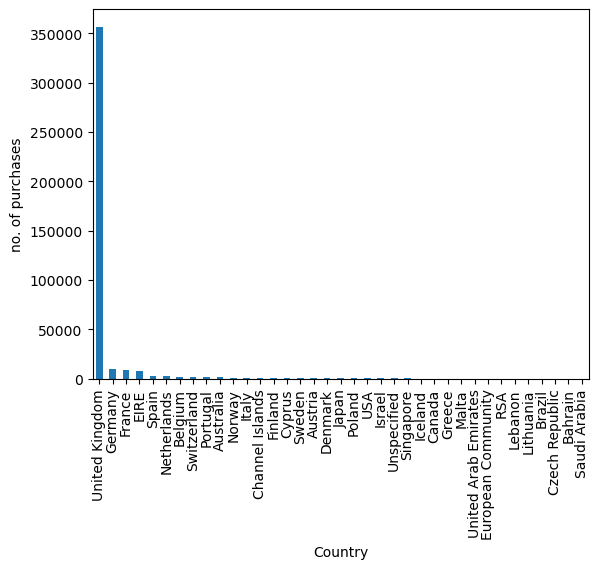

In [15]:
#plotting a bar chart to visualize the countries and no of purchases(invoices)
country_purchases.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('no. of purchases')
#plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

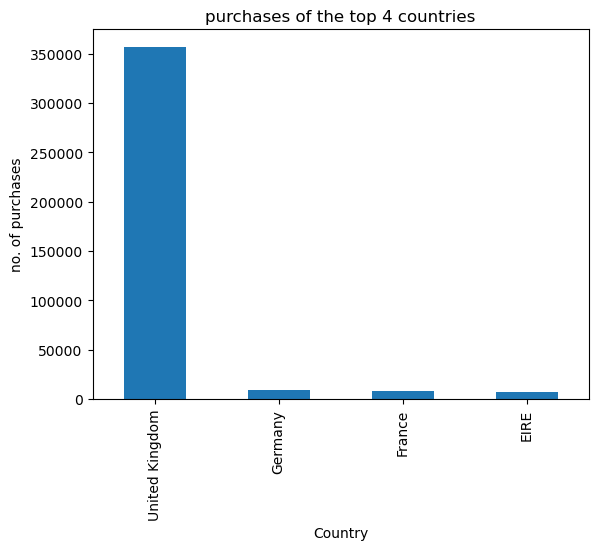

In [16]:
#plotting a bar chart to show purchases of top 4 countries
top4=country_purchases.head(4)

top4.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('no. of purchases')
plt.xticks(rotation=90)
plt.title('purchases of the top 4 countries')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

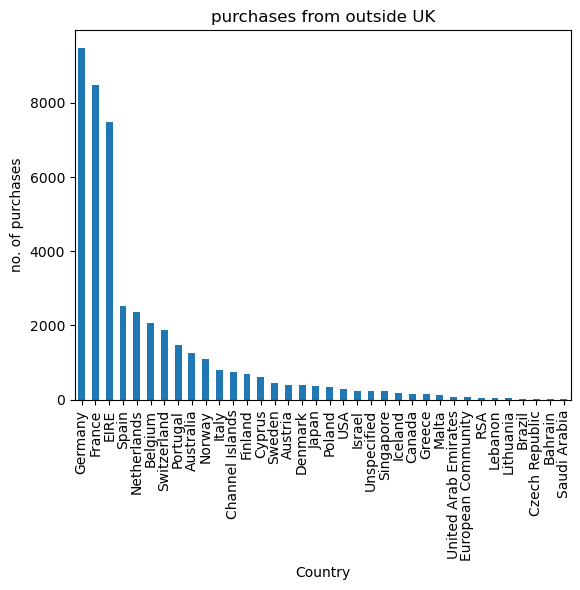

In [17]:
#plotting a bar chart showing purchases of other countries(excluding the main i.e UK)
other_countries=country_purchases.iloc[1:]

other_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('no. of purchases')
plt.xticks(rotation=90)
plt.title('purchases from outside UK')
plt.show


In [18]:
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,2010-12-01,1900-01-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01,1900-01-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01,1900-01-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01,1900-01-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01,1900-01-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


<AxesSubplot:xlabel='UnitPrice', ylabel='Count'>

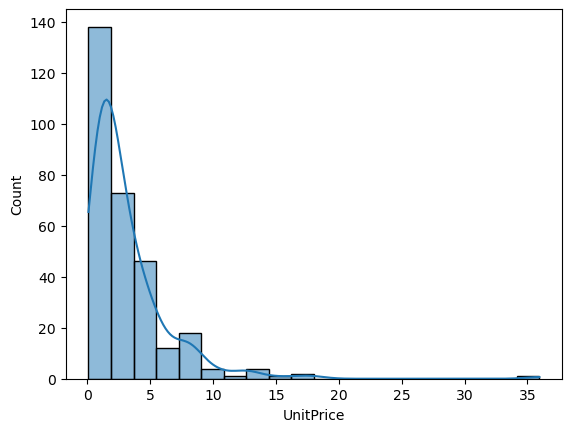

In [25]:
#creating a histogram for unit prices distribution
sns.histplot(df['UnitPrice'].sample(n = 300), kde = True, bins = 20)

<function matplotlib.pyplot.show(close=None, block=None)>

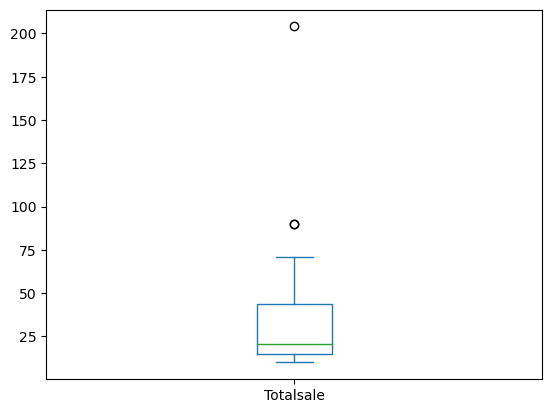

In [20]:
#creating a box plot for total sales
top50sales=df['Totalsale']
top50sales=top50sales.head(50)


top50sales.plot(kind='box')
plt.show

c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Totalsale'>

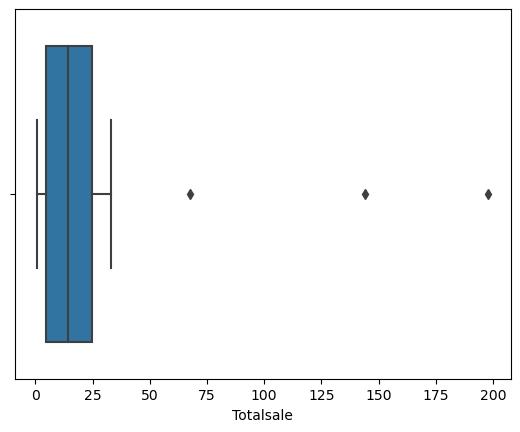

In [21]:
#using seaborn
sns.boxplot(df['Totalsale'].sample(n = 50))

<function matplotlib.pyplot.show(close=None, block=None)>

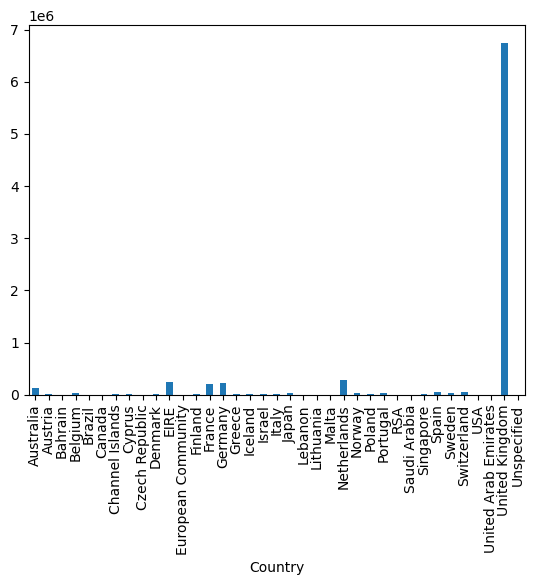

In [30]:
#using bar chart to show spendings of the different countries
country_sales=df.groupby('Country')['Totalsale'].sum()

country_sales.plot(kind='bar')
plt.title=('spending of countries')
plt.xlabel=('country')
plt.ylabel=('spending')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

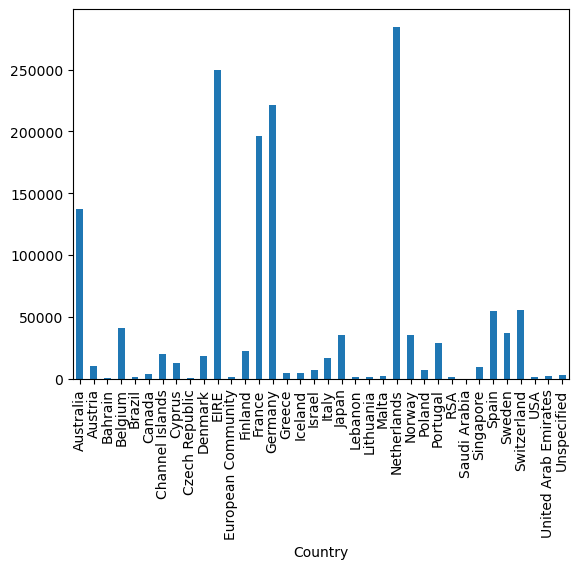

In [29]:
non_UK_country_sales=country_sales.drop(index='United Kingdom')

non_UK_country_sales.plot(kind='bar')
plt.title=('spending of other countries')
plt.xlabel=('country')
plt.ylabel=('spending')
plt.show

